# Proyecto Final 
## Predicción de Aprobación de Préstamos Bancarios mediante Clasificación

**Autor:** Juan Pablo Jiménez Martín, Fabian Rodriguez Herrera 

**Fecha:** Octubre 2025

**Objetivo:** Desarrollar una red neuronal artificial para predecir la probabilidad de aprobación de préstamos bancarios en función de las características del solicitante, alcanzando una precisión superior al 80%.

---


## Dataset:

El dataset utilizado proviene de **Kaggle**, creado por *Archit Sharma*, titulado **“Loan Approval Prediction Dataset”** ([enlace al dataset](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset)).

Este conjunto de datos fue elegido porque representa un problema real de **clasificación binaria**, donde el objetivo es predecir si un préstamo será **aprobado** o **rechazado** a partir de distintas características del solicitante, como su ingreso anual, número de dependientes, puntaje crediticio (*cibil_score*), activos y estado laboral.

Es ampliamente utilizado en proyectos de **aprendizaje automático** para poner en práctica procesos de:
- Análisis exploratorio de datos (EDA)
- Limpieza y preprocesamiento
- Normalización y codificación de variables
- Entrenamiento de modelos predictivos

El dataset es ideal para fines académicos por su tamaño moderado (~4,200 registros y 13 columnas) y porque permite aplicar conceptos clave de **machine learning** en un contexto financiero real.


### 1. ANÁLISIS Y EXPLORACIÓN DE DATOS
*¿Qué es?*
El análisis y exploración de datos (EDA, por sus siglas en inglés) es la primera etapa del proceso de ciencia de datos. Consiste en **examinar, describir y visualizar** la información contenida en el dataset para entender su estructura, detectar patrones, anomalías o errores y conocer la naturaleza de las variables.

¿Para qué sirve?
El EDA permite:
- Conocer la **distribución** y el **tipo de datos** de cada variable.
- Identificar **valores faltantes, duplicados o atípicos (outliers)**.
- Comprender las **relaciones entre variables**, especialmente con la variable objetivo (`loan_status`).
- Tomar decisiones informadas para el **preprocesamiento** y el **modelado posterior**.

¿Por qué es importante?
Porque un modelo de machine learning solo será tan bueno como los datos que lo alimentan.  
Un buen análisis inicial ayuda a:
- Detectar problemas de calidad en los datos antes del entrenamiento.
- Seleccionar las variables más relevantes.
- Evitar errores o sesgos que afecten el rendimiento del modelo.

#### 1.1. Carga y exploración inicial del dataset

##### 1.1.1. Importar librerías necesarias

En esta sección importaremos todas las librerías necesarias para el análisis exploratorio y preprocesamiento de datos. Utilizaremos:

- **pandas**: Para manipulación y análisis de datos
- **numpy**: Para operaciones numéricas
- **matplotlib y seaborn**: Para visualizaciones
- **sklearn**: Para preprocesamiento y división de datos
- **warnings**: Para suprimir advertencias innecesarias

In [91]:
# Importar librerías para manipulación de datos
import pandas as pd
import numpy as np

# Importar librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librerías de sklearn para preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar tamaño de figuras por defecto
plt.rcParams['figure.figsize'] = (10, 6)

# Suprimir advertencias
import warnings
warnings.filterwarnings('ignore')

##### 1.1.2. Cargar el dataset

Cargaremos el dataset de aprobación de préstamos desde el archivo CSV. Es importante verificar que la carga sea exitosa y conocer las dimensiones básicas del conjunto de datos.

In [92]:
# Cargar el dataset
df = pd.read_csv('dataset/loan_approval_dataset.csv')

# Mostrar dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"  - Número de registros (filas): {df.shape[0]}")
print(f"  - Número de características (columnas): {df.shape[1]}")

Dimensiones del dataset: (4269, 13)
  - Número de registros (filas): 4269
  - Número de características (columnas): 13


In [93]:
# Nos percatamos de que nuestro dataset tenia espacios en blanco en los nombres de las columnas, por lo que procederemos a limpiarlos para evitar problemas en el análisis.
print("Limpieza de nombres de columnas\n")
print("="*70)

print("Nombres ANTES de limpiar:")
print(df.columns.tolist())

# Eliminar espacios al inicio y final de los nombres de columnas
df.columns = df.columns.str.strip()

print("\nNombres DESPUÉS de limpiar:")
print(df.columns.tolist())

Limpieza de nombres de columnas

Nombres ANTES de limpiar:
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

Nombres DESPUÉS de limpiar:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


##### 1.1.3. Visualizar primeras filas del dataset

Examinaremos las primeras filas del dataset para comprender la estructura de los datos y el tipo de información que contiene cada columna.

In [94]:
# Mostrar las primeras 5 filas del dataset
print("Primeras 5 filas del dataset:\n")
df.head()

Primeras 5 filas del dataset:



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


##### 1.1.4. Información general del dataset

Obtendremos información detallada sobre el tipo de datos de cada columna, valores no nulos y uso de memoria. Esto es crucial para identificar problemas potenciales como valores faltantes o tipos de datos incorrectos.

In [95]:
# Información general del dataset
print("Información del dataset:\n")
df.info()

print("\n" + "="*50)
print("Resumen de tipos de datos:")
print("="*50)
print(df.dtypes.value_counts())

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB

Res

##### 1.1.5. Nombres y tipos de columnas

Listaremos todas las columnas del dataset y sus tipos de datos para tener una referencia clara de las variables con las que trabajaremos.

In [96]:
# Listar nombres de columnas
print("Columnas del dataset:")
print("="*50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col:30s} - Tipo: {df[col].dtype}")

print(f"\n{'='*50}")
print(f"Total de columnas: {len(df.columns)}")

# Separar columnas por tipo
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nColumnas numéricas ({len(columnas_numericas)}): {columnas_numericas}")
print(f"\nColumnas categóricas ({len(columnas_categoricas)}): {columnas_categoricas}")

Columnas del dataset:
 1. loan_id                        - Tipo: int64
 2. no_of_dependents               - Tipo: int64
 3. education                      - Tipo: object
 4. self_employed                  - Tipo: object
 5. income_annum                   - Tipo: int64
 6. loan_amount                    - Tipo: int64
 7. loan_term                      - Tipo: int64
 8. cibil_score                    - Tipo: int64
 9. residential_assets_value       - Tipo: int64
10. commercial_assets_value        - Tipo: int64
11. luxury_assets_value            - Tipo: int64
12. bank_asset_value               - Tipo: int64
13. loan_status                    - Tipo: object

Total de columnas: 13

Columnas numéricas (10): ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

Columnas categóricas (3): ['education', 'self_employed', 'loan_status']


#### 1.2. Análisis estadístico descriptivo

*¿Qué es?*
El análisis estadístico descriptivo consiste en aplicar medidas numéricas que **resumen y describen** el comportamiento de las variables del dataset.  
Incluye métricas como la **media**, **mediana**, **desviación estándar**, **mínimos y máximos**, y los **cuartiles** de cada columna numérica.

##### 1.2.1. Estadísticas descriptivas de variables numéricas

Calcularemos las estadísticas descriptivas básicas (media, desviación estándar, mínimo, máximo, cuartiles) para todas las variables numéricas. Esto nos ayudará a entender la distribución y rango de valores de cada característica.

In [97]:
# Estadísticas descriptivas de variables numéricas
print("ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS")
print("="*80)

stats_df = df.describe()
print(stats_df.round(2))

print("\n" + "="*80)
print("ANÁLISIS DE RANGOS:")
print("="*80)

for col in columnas_numericas:
    if col != 'loan_id':  # Excluir loan_id del análisis
        print(f"\n{col}:")
        print(f"  Rango: [{df[col].min():,.0f} - {df[col].max():,.0f}]")
        print(f"  Media: {df[col].mean():,.2f}")
        print(f"  Mediana: {df[col].median():,.2f}")
        print(f"  Desviación estándar: {df[col].std():,.2f}")

ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
       loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
count   4269.0            4269.0       4269.00      4269.00    4269.00   
mean    2135.0               2.5    5059123.92  15133450.46      10.90   
std     1232.5               1.7    2806839.83   9043362.98       5.71   
min        1.0               0.0     200000.00    300000.00       2.00   
25%     1068.0               1.0    2700000.00   7700000.00       6.00   
50%     2135.0               3.0    5100000.00  14500000.00      10.00   
75%     3202.0               4.0    7500000.00  21500000.00      16.00   
max     4269.0               5.0    9900000.00  39500000.00      20.00   

       cibil_score  residential_assets_value  commercial_assets_value  \
count      4269.00                   4269.00                  4269.00   
mean        599.94                7472616.54               4973155.31   
std         172.43                6503636.59               438896

##### 1.2.2. Estadísticas de variables categóricas

Analizaremos las variables categóricas para entender sus categorías únicas y la distribución de cada una.

In [98]:
# Análisis de variables categóricas
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

for col in columnas_categoricas:
    print(f"\n{col}:")
    print(f"  Valores únicos: {df[col].nunique()}")
    print(f"  Categorías: {df[col].unique()}")
    print(f"\n  Distribución de frecuencias:")
    print(df[col].value_counts())
    print(f"\n  Distribución porcentual:")
    print(df[col].value_counts(normalize=True).mul(100).round(2))
    print("-"*80)

ANÁLISIS DE VARIABLES CATEGÓRICAS

education:
  Valores únicos: 2
  Categorías: [' Graduate' ' Not Graduate']

  Distribución de frecuencias:
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

  Distribución porcentual:
education
Graduate        50.22
Not Graduate    49.78
Name: proportion, dtype: float64
--------------------------------------------------------------------------------

self_employed:
  Valores únicos: 2
  Categorías: [' No' ' Yes']

  Distribución de frecuencias:
self_employed
Yes    2150
No     2119
Name: count, dtype: int64

  Distribución porcentual:
self_employed
Yes    50.36
No     49.64
Name: proportion, dtype: float64
--------------------------------------------------------------------------------

loan_status:
  Valores únicos: 2
  Categorías: [' Approved' ' Rejected']

  Distribución de frecuencias:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

  Distribución porcentual:
loan_status
Approved    62.22
Rejec

##### 1.2.3. Verificar valores faltantes

Es crucial identificar si existen valores faltantes (NaN o nulos) en el dataset, ya que estos deben tratarse antes de entrenar la red neuronal.

In [99]:
# Verificar valores faltantes
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)

# Contar valores nulos por columna
valores_nulos = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

# Crear dataframe resumen
resumen_nulos = pd.DataFrame({
    'Columna': valores_nulos.index,
    'Valores_Nulos': valores_nulos.values,
    'Porcentaje': porcentaje_nulos.values
})

print(resumen_nulos)

print(f"\n{'='*80}")
print(f"Total de valores nulos en el dataset: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() == 0:
    print("No se encontraron valores faltantes en el dataset")
else:
    print(f"Se encontraron {df.isnull().sum().sum()} valores faltantes")

ANÁLISIS DE VALORES FALTANTES
                     Columna  Valores_Nulos  Porcentaje
0                    loan_id              0         0.0
1           no_of_dependents              0         0.0
2                  education              0         0.0
3              self_employed              0         0.0
4               income_annum              0         0.0
5                loan_amount              0         0.0
6                  loan_term              0         0.0
7                cibil_score              0         0.0
8   residential_assets_value              0         0.0
9    commercial_assets_value              0         0.0
10       luxury_assets_value              0         0.0
11          bank_asset_value              0         0.0
12               loan_status              0         0.0

Total de valores nulos en el dataset: 0
No se encontraron valores faltantes en el dataset


##### 1.2.4. Detectar valores duplicados

Verificaremos si existen registros duplicados en el dataset que puedan afectar el entrenamiento del modelo.

In [100]:
# Detectar valores duplicados
print("ANÁLISIS DE VALORES DUPLICADOS")
print("="*80)

# Contar duplicados totales
duplicados_totales = df.duplicated().sum()
print(f"Registros duplicados: {duplicados_totales}")

if duplicados_totales > 0:
    print(f"Porcentaje de duplicados: {(duplicados_totales/len(df)*100):.2f}%")
    print("\nPrimeros registros duplicados:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("No se encontraron registros duplicados")


ANÁLISIS DE VALORES DUPLICADOS
Registros duplicados: 0
No se encontraron registros duplicados


#### 1.3. Visualización de distribuciones

##### 1.3.1. Distribución de variables numéricas

Visualizaremos la distribución de cada variable numérica mediante histogramas. Esto nos ayuda a identificar:
- Forma de la distribución (normal, sesgada, bimodal)
- Presencia de outliers
- Rangos de valores

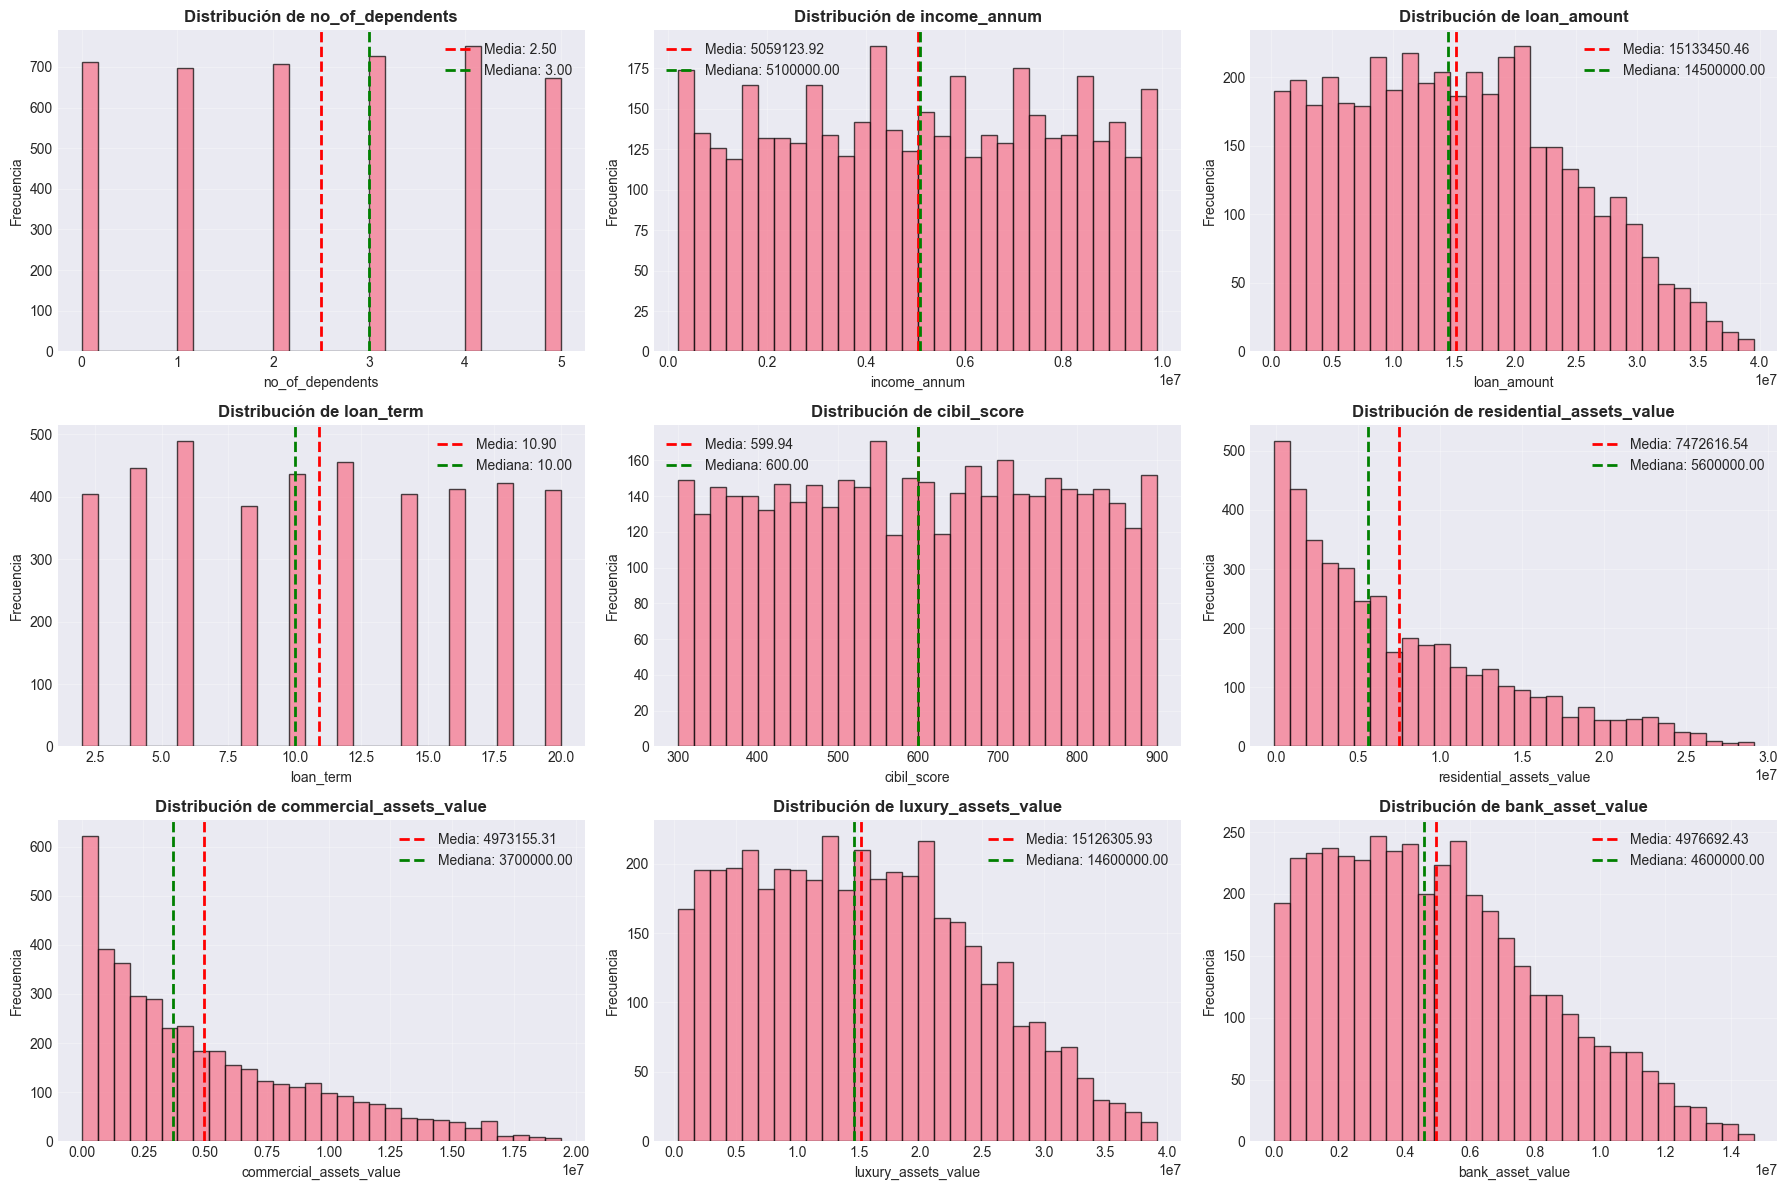

In [101]:
# Histogramas de variables numéricas
variables_numericas_analisis = [col for col in columnas_numericas if col != 'loan_id']

# Crear figura con subplots
n_cols = 3
n_rows = int(np.ceil(len(variables_numericas_analisis) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.ravel()

for idx, col in enumerate(variables_numericas_analisis):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)
    
    # Agregar líneas de media y mediana
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Media: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', 
                      linewidth=2, label=f'Mediana: {df[col].median():.2f}')
    axes[idx].legend()

# Ocultar ejes sobrantes
for idx in range(len(variables_numericas_analisis), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

##### 1.3.2. Boxplots de variables numéricas

Los boxplots (diagramas de caja) nos permiten identificar visualmente outliers y entender la dispersión de los datos a través de los cuartiles.

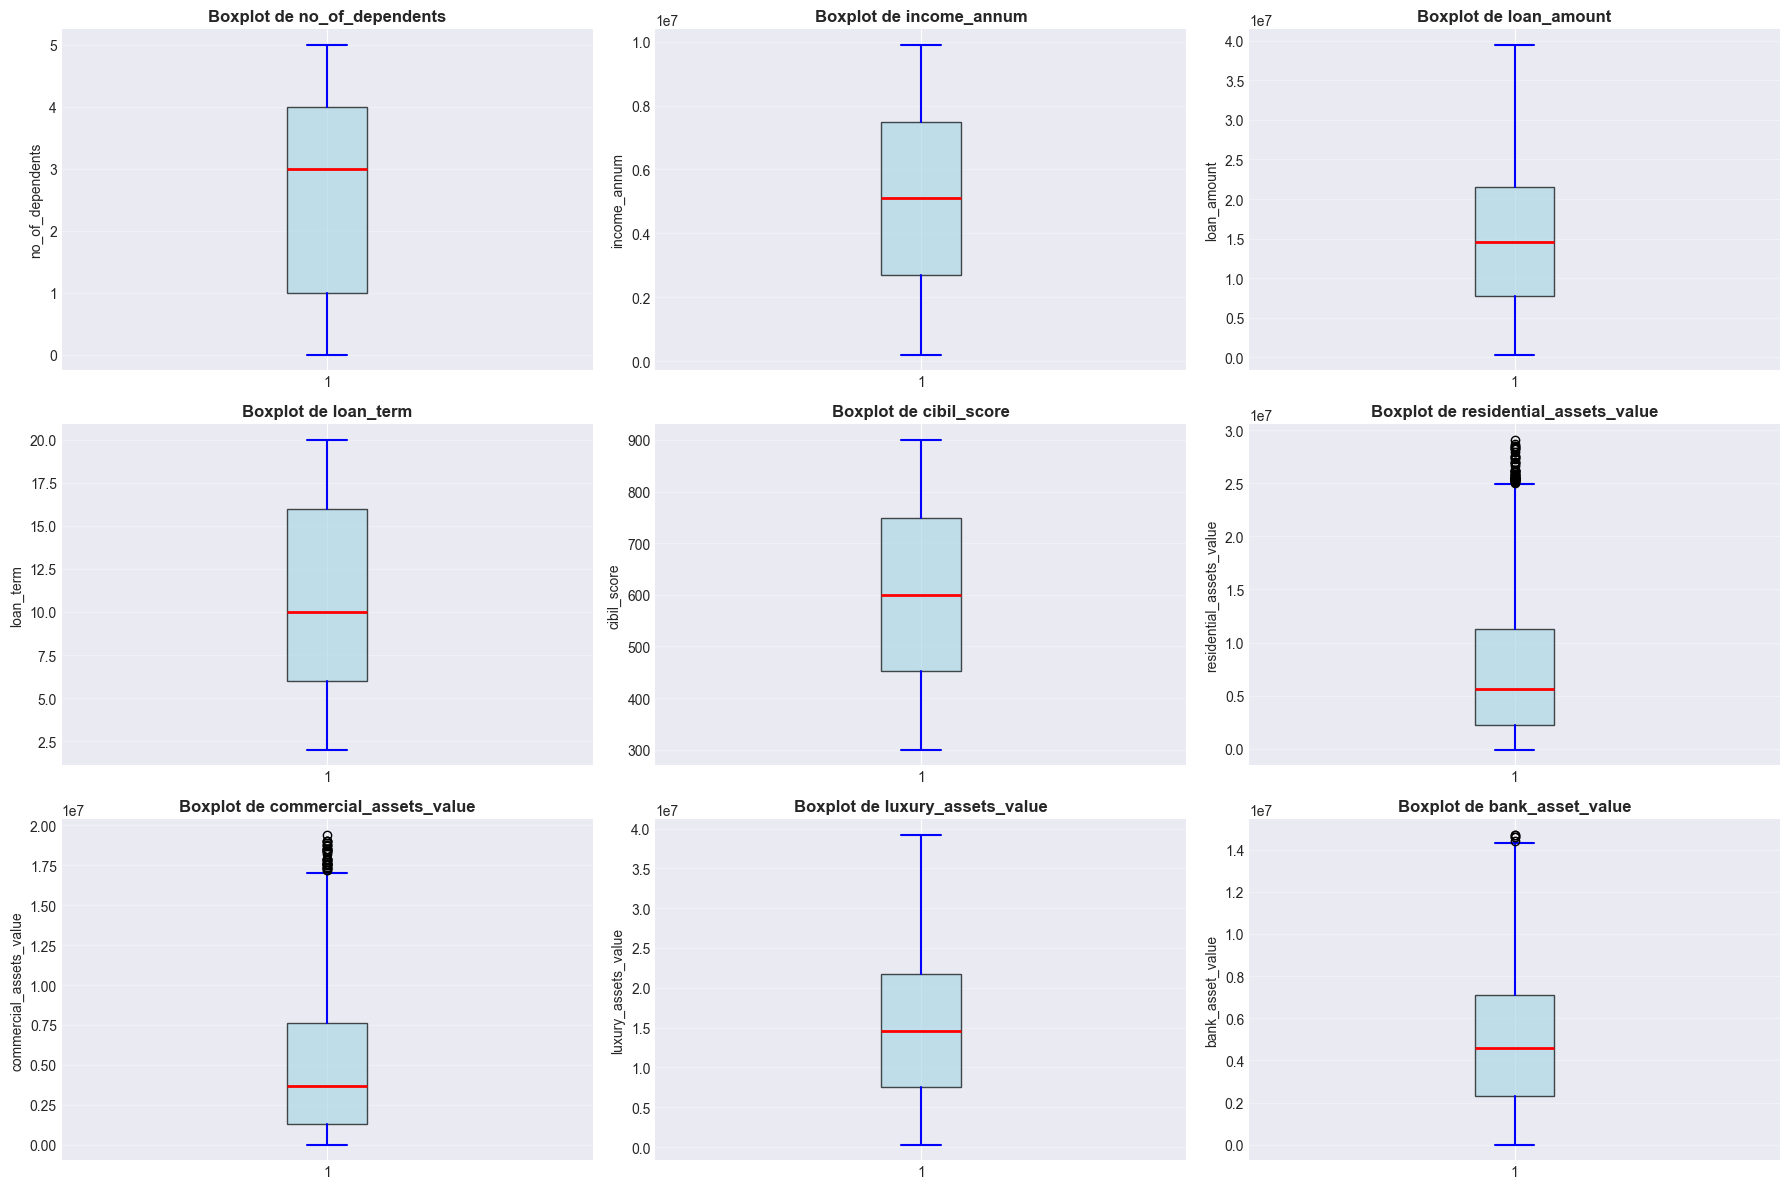

In [102]:
# Boxplots de variables numéricas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.ravel()

for idx, col in enumerate(variables_numericas_analisis):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue', linewidth=1.5),
                      capprops=dict(color='blue', linewidth=1.5))
    axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')

# Ocultar ejes sobrantes
for idx in range(len(variables_numericas_analisis), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### 1.4. Análisis de la variable objetivo
*¿Qué es?*
El análisis de la variable objetivo consiste en estudiar la **columna que el modelo debe predecir**, en este caso `loan_status`, que indica si un préstamo fue **aprobado** o **rechazado**.  
Es una variable **categórica binaria** (dos posibles resultados), y su comportamiento define el tipo de problema de aprendizaje automático.

##### 1.4.1. Distribución de loan_status

La variable objetivo (loan_status) es la que queremos predecir. Es fundamental analizar su distribución para determinar si existe desbalanceo de clases, lo cual afectará el diseño y entrenamiento de nuestra red neuronal.

ANÁLISIS DE LA VARIABLE OBJETIVO: loan_status

Distribución de frecuencias:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Distribución porcentual:
   Approved: 62.22%
   Rejected: 37.78%

Ratio de desbalanceo: 1.65:1
El dataset presenta desbalanceo de clases (ratio > 1.5)
  Será necesario aplicar técnicas de balanceo en el preprocesamiento


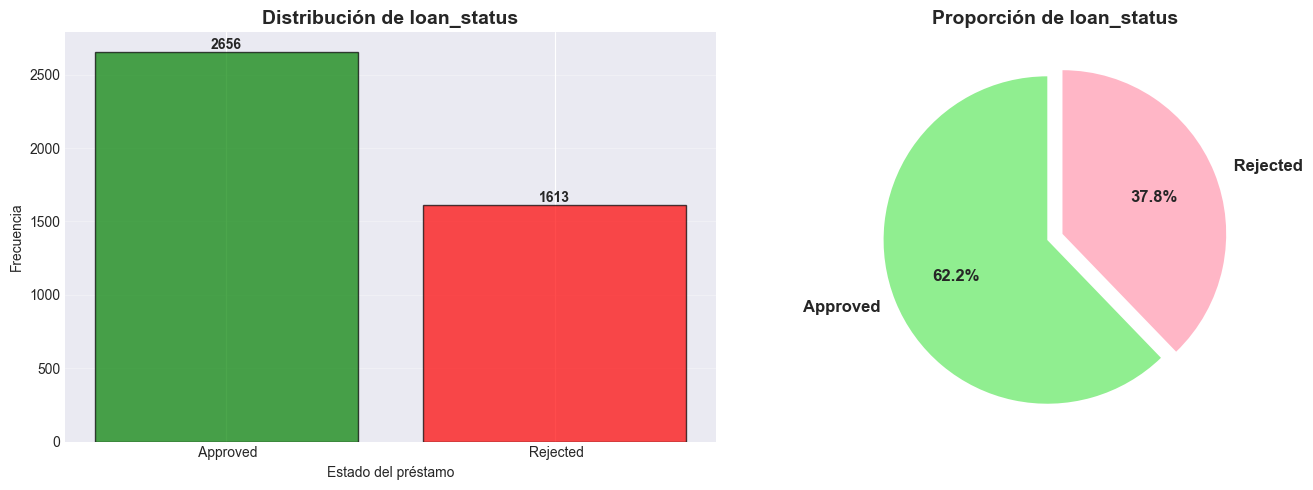

In [103]:
# Análisis detallado de la variable objetivo
print("ANÁLISIS DE LA VARIABLE OBJETIVO: loan_status")
print("="*80)

# Contar frecuencias
conteo_objetivo = df['loan_status'].value_counts()
porcentaje_objetivo = df['loan_status'].value_counts(normalize=True).mul(100)

print("\nDistribución de frecuencias:")
print(conteo_objetivo)

print("\nDistribución porcentual:")
for categoria, porcentaje in porcentaje_objetivo.items():
    print(f"  {categoria}: {porcentaje:.2f}%")

# Calcular ratio de desbalanceo
ratio = conteo_objetivo.max() / conteo_objetivo.min()
print(f"\nRatio de desbalanceo: {ratio:.2f}:1")

if ratio > 1.5:
    print("El dataset presenta desbalanceo de clases (ratio > 1.5)")
    print("  Será necesario aplicar técnicas de balanceo en el preprocesamiento")
else:
    print("El dataset está relativamente balanceado")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(conteo_objetivo.index, conteo_objetivo.values, 
            color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de loan_status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Estado del préstamo')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3, axis='y')

# Agregar valores
for i, v in enumerate(conteo_objetivo.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
colors = ['#90EE90', '#FFB6C6']
axes[1].pie(conteo_objetivo.values, labels=conteo_objetivo.index, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=(0.05, 0.05),
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporción de loan_status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

##### 1.4.2. Matriz de correlación con loan_status

Analizaremos la correlación entre las variables numéricas y la variable objetivo. Esto nos ayuda a identificar qué características tienen mayor relación con la aprobación/rechazo del préstamo.

CORRELACIÓN DE VARIABLES CON loan_status
cibil_score                 0.770518
loan_amount                 0.016150
commercial_assets_value     0.008246
bank_asset_value           -0.006778
residential_assets_value   -0.014367
income_annum               -0.015189
luxury_assets_value        -0.015465
no_of_dependents           -0.018114
loan_term                  -0.113036


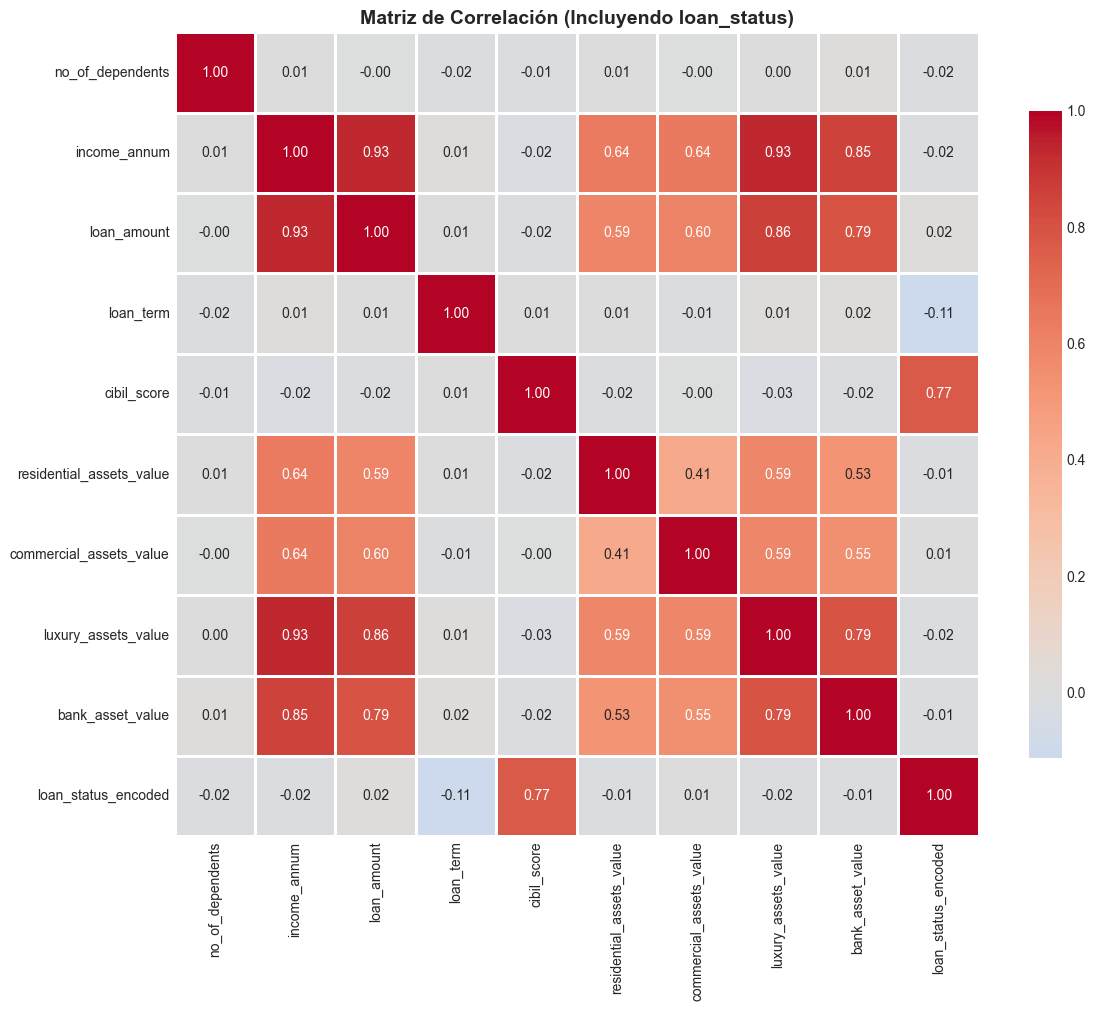

In [104]:
# Crear copia del dataframe y codificar loan_status temporalmente para correlación
df_corr = df.copy()

# Codificar loan_status: Approved=1, Rejected=0
df_corr['loan_status_encoded'] = df_corr['loan_status'].map({' Approved': 1, 'Approved': 1, 
                                                               ' Rejected': 0, 'Rejected': 0})

# Seleccionar solo variables numéricas + loan_status_encoded
variables_para_corr = variables_numericas_analisis + ['loan_status_encoded']
df_correlacion = df_corr[variables_para_corr]

# Calcular matriz de correlación
matriz_correlacion = df_correlacion.corr()

# Correlaciones con loan_status ordenadas
correlaciones_objetivo = matriz_correlacion['loan_status_encoded'].drop('loan_status_encoded').sort_values(ascending=False)

print("CORRELACIÓN DE VARIABLES CON loan_status")
print("="*80)
print(correlaciones_objetivo.to_string())

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación (Incluyendo loan_status)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


##### 1.4.3. Análisis de relación entre variables categóricas y loan_status

Examinaremos cómo se distribuye la aprobación de préstamos según las variables categóricas (educación y situación laboral).

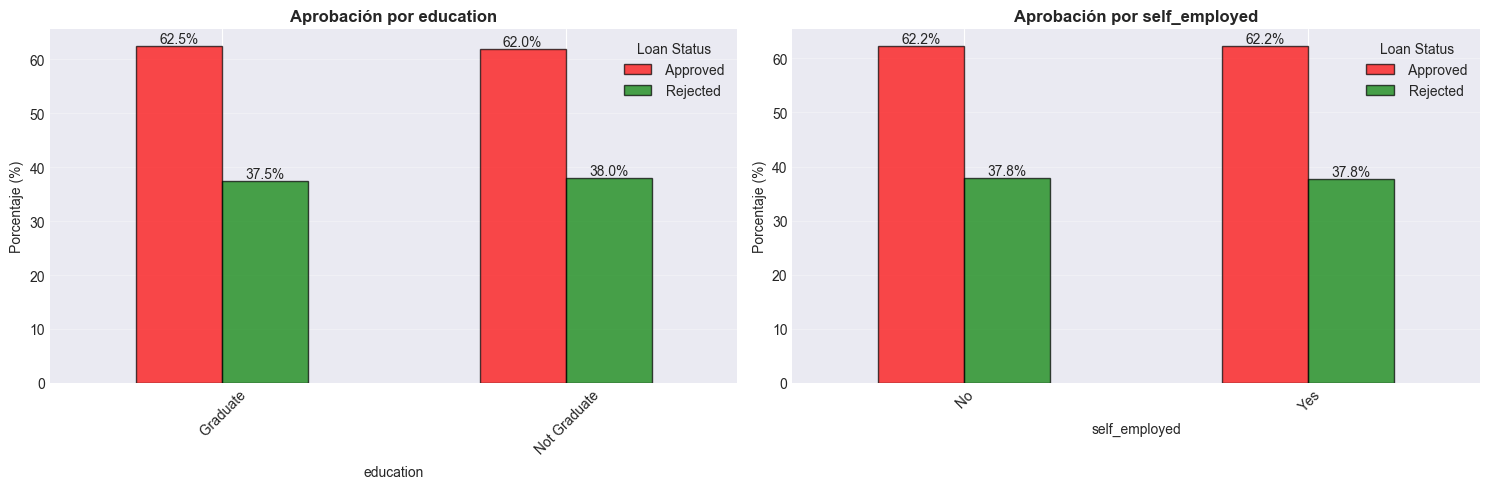


TABLAS DE CONTINGENCIA

education vs loan_status:
loan_status     Approved   Rejected   All
education                                
 Graduate           1339        805  2144
 Not Graduate       1317        808  2125
All                 2656       1613  4269

Porcentajes por fila:
loan_status   Approved  Rejected
education                       
Graduate         62.45     37.55
Not Graduate     61.98     38.02
--------------------------------------------------------------------------------

self_employed vs loan_status:
loan_status     Approved   Rejected   All
self_employed                            
 No                 1318        801  2119
 Yes                1338        812  2150
All                 2656       1613  4269

Porcentajes por fila:
loan_status    Approved  Rejected
self_employed                    
No                62.20     37.80
Yes               62.23     37.77
--------------------------------------------------------------------------------


In [105]:
# Análisis de variables categóricas vs loan_status
variables_cat_analisis = [col for col in columnas_categoricas if col != 'loan_status']

fig, axes = plt.subplots(1, len(variables_cat_analisis), figsize=(15, 5))

for idx, col in enumerate(variables_cat_analisis):
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    
    # Graficar
    tabla_contingencia.plot(kind='bar', ax=axes[idx], rot=45, 
                            color=['red', 'green'], alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Aprobación por {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Porcentaje (%)')
    axes[idx].legend(title='Loan Status', loc='best')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Agregar valores
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

# Imprimir tablas de contingencia
print("\nTABLAS DE CONTINGENCIA")
print("="*80)

for col in variables_cat_analisis:
    print(f"\n{col} vs loan_status:")
    tabla = pd.crosstab(df[col], df['loan_status'], margins=True)
    print(tabla)
    
    print(f"\nPorcentajes por fila:")
    tabla_pct = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    print(tabla_pct.round(2))
    print("-"*80)

## 2. PREPROCESAMIENTO DE DATOS

*¿Qué es?*
El preprocesamiento de datos es la etapa en la que se **preparan y transforman los datos** para que puedan ser utilizados correctamente por los algoritmos de machine learning.  
Incluye tareas como limpiar valores erróneos, normalizar escalas numéricas, codificar variables categóricas y balancear las clases del dataset.

### 2.1. Limpieza de datos
*¿Qué es?*
La limpieza de datos es el proceso de **detectar y corregir errores, inconsistencias o valores anómalos** dentro del dataset.  
Su objetivo es asegurar que toda la información sea precisa, coherente y útil para el análisis y el modelado.

*¿Por qué se hace?*
Porque los datos reales suelen contener:
- **Errores humanos** (espacios en blanco, valores mal escritos o negativos donde no deberían existir).  
- **Duplicados o valores faltantes**, que pueden distorsionar los resultados.  
- **Valores fuera de rango o inconsistentes**, que afectan las estadísticas y el aprendizaje del modelo.

*¿Para qué sirve?*
Sirve para:
- Garantizar que el modelo trabaje con **información verídica y confiable**.  
- Evitar resultados engañosos o sesgados.  
- Mejorar la **calidad y estabilidad** del modelo de predicción.  
- Asegurar que los patrones descubiertos reflejen la realidad del problema (en este caso, la aprobación de préstamos).

#### 2.1.1. Limpieza de espacios en valores categóricos

Hemos detectado que las columnas categóricas tienen espacios en blanco al inicio de sus valores. Esto puede causar problemas en la codificación y análisis. Procederemos a eliminar estos espacios.

In [106]:
# Crear una copia del dataframe para el preprocesamiento
df_clean = df.copy()

print("LIMPIEZA DE ESPACIOS EN VALORES CATEGÓRICOS")
print("="*80)

# Mostrar valores antes de la limpieza
print("\nValores ANTES de limpiar:")
for col in columnas_categoricas:
    print(f"\n{col}: {df_clean[col].unique()}")

# Limpiar espacios en valores de columnas categóricas
for col in columnas_categoricas:
    df_clean[col] = df_clean[col].str.strip()

# Mostrar valores después de la limpieza
print("\n" + "="*80)
print("Valores DESPUÉS de limpiar:")
for col in columnas_categoricas:
    print(f"\n{col}: {df_clean[col].unique()}")

LIMPIEZA DE ESPACIOS EN VALORES CATEGÓRICOS

Valores ANTES de limpiar:

education: [' Graduate' ' Not Graduate']

self_employed: [' No' ' Yes']

loan_status: [' Approved' ' Rejected']

Valores DESPUÉS de limpiar:

education: ['Graduate' 'Not Graduate']

self_employed: ['No' 'Yes']

loan_status: ['Approved' 'Rejected']


#### 2.1.2. Detección y manejo de valores negativos en activos

Durante el análisis exploratorio detectamos valores negativos en `residential_assets_value` (-100,000). Los valores de activos no pueden ser negativos, por lo que estos representan errores en los datos o valores faltantes codificados incorrectamente.

Estrategia: Reemplazaremos los valores negativos con 0, asumiendo que representan ausencia de ese tipo de activo.

In [107]:
# Identificar valores negativos en columnas de activos
print("DETECCIÓN DE VALORES NEGATIVOS EN ACTIVOS")
print("="*80)

columnas_activos = ['residential_assets_value', 'commercial_assets_value', 
                    'luxury_assets_value', 'bank_asset_value']

# Contar valores negativos
valores_negativos_detectados = False
for col in columnas_activos:
    negativos = (df_clean[col] < 0).sum()
    if negativos > 0:
        valores_negativos_detectados = True
        print(f"\n{col}:")
        print(f"  Valores negativos encontrados: {negativos}")
        print(f"  Valor mínimo: {df_clean[col].min():,.0f}")
        print(f"  Registros afectados:")
        print(df_clean[df_clean[col] < 0][[col, 'loan_status']].head())

if not valores_negativos_detectados:
    print("\n✓ No se encontraron valores negativos")
else:
    # Reemplazar valores negativos con 0
    print("\n" + "="*80)
    print("CORRECCIÓN DE VALORES NEGATIVOS")
    print("="*80)
    
    for col in columnas_activos:
        negativos_antes = (df_clean[col] < 0).sum()
        if negativos_antes > 0:
            df_clean[col] = df_clean[col].clip(lower=0)
            print(f"\n{col}: {negativos_antes} valores negativos reemplazados con 0")
    
    # Verificar que no queden valores negativos
    print("\nVerificación post-corrección:")
    for col in columnas_activos:
        negativos_despues = (df_clean[col] < 0).sum()
        print(f"  {col}: {negativos_despues} valores negativos")
    
    print("\nValores negativos corregidos exitosamente")

DETECCIÓN DE VALORES NEGATIVOS EN ACTIVOS

residential_assets_value:
  Valores negativos encontrados: 28
  Valor mínimo: -100,000
  Registros afectados:
     residential_assets_value loan_status
59                    -100000    Approved
196                   -100000    Approved
559                   -100000    Rejected
702                   -100000    Approved
737                   -100000    Rejected

CORRECCIÓN DE VALORES NEGATIVOS

residential_assets_value: 28 valores negativos reemplazados con 0

Verificación post-corrección:
  residential_assets_value: 0 valores negativos
  commercial_assets_value: 0 valores negativos
  luxury_assets_value: 0 valores negativos
  bank_asset_value: 0 valores negativos

Valores negativos corregidos exitosamente


#### 2.1.3. Análisis cuantitativo de outliers

Los outliers son valores extremos que se alejan significativamente del resto de los datos. Utilizaremos el método del Rango Intercuartílico (IQR) para identificarlos cuantitativamente.

**Método IQR:**
- Outlier inferior: valor < Q1 - 1.5 × IQR
- Outlier superior: valor > Q3 + 1.5 × IQR

Donde Q1 es el primer cuartil (percentil 25) y Q3 es el tercer cuartil (percentil 75).

In [108]:
# Detección cuantitativa de outliers usando IQR
print("ANÁLISIS CUANTITATIVO DE OUTLIERS (MÉTODO IQR)")
print("="*80)

# Excluir loan_id del análisis
variables_para_outliers = [col for col in columnas_numericas if col != 'loan_id']

# Crear dataframe para almacenar resultados
outliers_summary = []

for col in variables_para_outliers:
    # Calcular cuartiles e IQR
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers_inferiores = df_clean[df_clean[col] < limite_inferior]
    outliers_superiores = df_clean[df_clean[col] > limite_superior]
    total_outliers = len(outliers_inferiores) + len(outliers_superiores)
    porcentaje_outliers = (total_outliers / len(df_clean)) * 100
    
    # Guardar resultados
    outliers_summary.append({
        'Variable': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Límite_Inferior': limite_inferior,
        'Límite_Superior': limite_superior,
        'Outliers_Inferiores': len(outliers_inferiores),
        'Outliers_Superiores': len(outliers_superiores),
        'Total_Outliers': total_outliers,
        'Porcentaje': porcentaje_outliers
    })

# Crear dataframe resumen
df_outliers = pd.DataFrame(outliers_summary)

# Mostrar resumen
print("\nResumen de Outliers por Variable:")
print(df_outliers[['Variable', 'Total_Outliers', 'Porcentaje']].to_string(index=False))

# Mostrar detalles de variables con outliers significativos
print("\n" + "="*80)
print("DETALLES DE VARIABLES CON OUTLIERS:")
print("="*80)

for _, row in df_outliers.iterrows():
    if row['Total_Outliers'] > 0:
        print(f"\n{row['Variable']}:")
        print(f"  Rango normal: [{row['Límite_Inferior']:,.2f} - {row['Límite_Superior']:,.2f}]")
        print(f"  Outliers inferiores: {row['Outliers_Inferiores']}")
        print(f"  Outliers superiores: {row['Outliers_Superiores']}")
        print(f"  Total outliers: {row['Total_Outliers']} ({row['Porcentaje']:.2f}%)")


ANÁLISIS CUANTITATIVO DE OUTLIERS (MÉTODO IQR)

Resumen de Outliers por Variable:
                Variable  Total_Outliers  Porcentaje
        no_of_dependents               0    0.000000
            income_annum               0    0.000000
             loan_amount               0    0.000000
               loan_term               0    0.000000
             cibil_score               0    0.000000
residential_assets_value              52    1.218084
 commercial_assets_value              37    0.866714
     luxury_assets_value               0    0.000000
        bank_asset_value               5    0.117123

DETALLES DE VARIABLES CON OUTLIERS:

residential_assets_value:
  Rango normal: [-11,450,000.00 - 24,950,000.00]
  Outliers inferiores: 0
  Outliers superiores: 52
  Total outliers: 52 (1.22%)

commercial_assets_value:
  Rango normal: [-8,150,000.00 - 17,050,000.00]
  Outliers inferiores: 0
  Outliers superiores: 37
  Total outliers: 37 (0.87%)

bank_asset_value:
  Rango normal: [-4,90

Para este proyecto, MANTENDREMOS los outliers por las siguientes razones:

1. Representan casos reales del negocio (préstamos grandes, ingresos altos, etc.)
2. No son errores de medición sino variabilidad natural
3. La normalización ayudará a mitigar su impacto
4. Las redes neuronales son robustas ante outliers cuando los datos están normalizados
5. Eliminarlos podría reducir significativamente el dataset

Sin embargo, la normalización en el siguiente paso reducirá su impacto.

#### 2.1.4. Verificación final de datos limpios

Verificaremos que todas las operaciones de limpieza se hayan completado correctamente y que el dataset esté listo para la siguiente etapa de preprocesamiento.

In [109]:
# Verificación final después de la limpieza
print("VERIFICACIÓN FINAL DE DATOS LIMPIOS")
print("="*80)

print("\n1. Dimensiones del dataset:")
print(f"   Filas: {df_clean.shape[0]}")
print(f"   Columnas: {df_clean.shape[1]}")

print("\n2. Valores nulos:")
print(f"   Total: {df_clean.isnull().sum().sum()}")

print("\n3. Valores duplicados:")
print(f"   Total: {df_clean.duplicated().sum()}")

print("\n4. Valores negativos en columnas de activos:")
negativos_total = 0
for col in columnas_activos:
    negativos = (df_clean[col] < 0).sum()
    negativos_total += negativos
    print(f"   {col}: {negativos}")
print(f"   Total valores negativos: {negativos_total}")

print("\n5. Valores categóricos limpios:")
for col in columnas_categoricas:
    print(f"   {col}: {df_clean[col].unique()}")


VERIFICACIÓN FINAL DE DATOS LIMPIOS

1. Dimensiones del dataset:
   Filas: 4269
   Columnas: 13

2. Valores nulos:
   Total: 0

3. Valores duplicados:
   Total: 0

4. Valores negativos en columnas de activos:
   residential_assets_value: 0
   commercial_assets_value: 0
   luxury_assets_value: 0
   bank_asset_value: 0
   Total valores negativos: 0

5. Valores categóricos limpios:
   education: ['Graduate' 'Not Graduate']
   self_employed: ['No' 'Yes']
   loan_status: ['Approved' 'Rejected']


### 2.2. Normalización de características numéricas

#### 2.2.1. Importancia de la normalización

La normalización es esencial para redes neuronales porque:

1. **Diferentes escalas**: Nuestras variables tienen rangos muy diferentes:
   - `no_of_dependents`: [0-5]
   - `income_annum`: [200,000 - 9,900,000]
   - `cibil_score`: [300-900]

2. **Convergencia más rápida**: Gradientes balanceados aceleran el entrenamiento

3. **Evita dominancia**: Variables con valores grandes no dominarán el aprendizaje

4. **Estabilidad numérica**: Previene problemas de overflow/underflow

Utilizaremos **StandardScaler** que transforma los datos para tener media=0 y desviación estándar=1:

$$z = \frac{x - \mu}{\sigma}$$

Donde:
- $x$ es el valor original
- $\mu$ es la media
- $\sigma$ es la desviación estándar
- $z$ es el valor normalizado

In [110]:
# Preparar datos para normalización
print("PREPARACIÓN PARA NORMALIZACIÓN")
print("="*80)

# Separar características numéricas (excluir loan_id)
columnas_para_normalizar = [col for col in columnas_numericas if col != 'loan_id']

print(f"\nColumnas a normalizar ({len(columnas_para_normalizar)}):")
for i, col in enumerate(columnas_para_normalizar, 1):
    print(f"  {i}. {col}")

# Mostrar estadísticas antes de normalización
print("\n" + "="*80)
print("ESTADÍSTICAS ANTES DE NORMALIZACIÓN:")
print("="*80)
print("\nRangos de valores:")
for col in columnas_para_normalizar:
    print(f"  {col:30s}: [{df_clean[col].min():>15,.2f} - {df_clean[col].max():>15,.2f}]")

PREPARACIÓN PARA NORMALIZACIÓN

Columnas a normalizar (9):
  1. no_of_dependents
  2. income_annum
  3. loan_amount
  4. loan_term
  5. cibil_score
  6. residential_assets_value
  7. commercial_assets_value
  8. luxury_assets_value
  9. bank_asset_value

ESTADÍSTICAS ANTES DE NORMALIZACIÓN:

Rangos de valores:
  no_of_dependents              : [           0.00 -            5.00]
  income_annum                  : [     200,000.00 -    9,900,000.00]
  loan_amount                   : [     300,000.00 -   39,500,000.00]
  loan_term                     : [           2.00 -           20.00]
  cibil_score                   : [         300.00 -          900.00]
  residential_assets_value      : [           0.00 -   29,100,000.00]
  commercial_assets_value       : [           0.00 -   19,400,000.00]
  luxury_assets_value           : [     300,000.00 -   39,200,000.00]
  bank_asset_value              : [           0.00 -   14,700,000.00]


#### 2.2.2. Aplicar StandardScaler

Aplicaremos StandardScaler a todas las características numéricas. Es importante crear el scaler ANTES de dividir los datos para evitar data leakage (fuga de información).

In [111]:
# Crear el scaler
scaler = StandardScaler()

# Crear copia del dataframe para datos normalizados
df_normalized = df_clean.copy()

# Aplicar normalización
print("APLICANDO NORMALIZACIÓN (StandardScaler)")
print("="*80)

# Normalizar las columnas numéricas
df_normalized[columnas_para_normalizar] = scaler.fit_transform(df_clean[columnas_para_normalizar])

print("\nNormalización aplicada exitosamente")

# Verificar normalización
print("\n" + "="*80)
print("VERIFICACIÓN DE NORMALIZACIÓN:")
print("="*80)

print("\nEstadísticas después de normalización:")
print(df_normalized[columnas_para_normalizar].describe().round(4))

print("\n" + "="*80)
print("Verificación de media ≈ 0 y desviación estándar ≈ 1:")
for col in columnas_para_normalizar:
    media = df_normalized[col].mean()
    std = df_normalized[col].std()
    print(f"  {col:30s}: media={media:>8.4f}, std={std:>8.4f}")

print("\nTodas las variables normalizadas tienen media ≈ 0 y std ≈ 1")

APLICANDO NORMALIZACIÓN (StandardScaler)

Normalización aplicada exitosamente

VERIFICACIÓN DE NORMALIZACIÓN:

Estadísticas después de normalización:
       no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
count         4269.0000     4269.0000    4269.0000  4269.0000    4269.0000   
mean             0.0000        0.0000       0.0000    -0.0000       0.0000   
std              1.0001        1.0001       1.0001     1.0001       1.0001   
min             -1.4735       -1.7314      -1.6405    -1.5592      -1.7397   
25%             -0.8838       -0.8406      -0.8221    -0.8584      -0.8522   
50%              0.2956        0.0146      -0.0701    -0.1577       0.0004   
75%              0.8853        0.8697       0.7041     0.8933       0.8588   
max              1.4751        1.7249       2.6947     1.5940       1.7404   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count                 4269.0000                4269.0000          

#### 2.2.3. Visualización comparativa antes/después de normalización

Visualizaremos algunas variables para comparar su distribución antes y después de la normalización.

VISUALIZACIÓN DEL EFECTO DE LA NORMALIZACIÓN


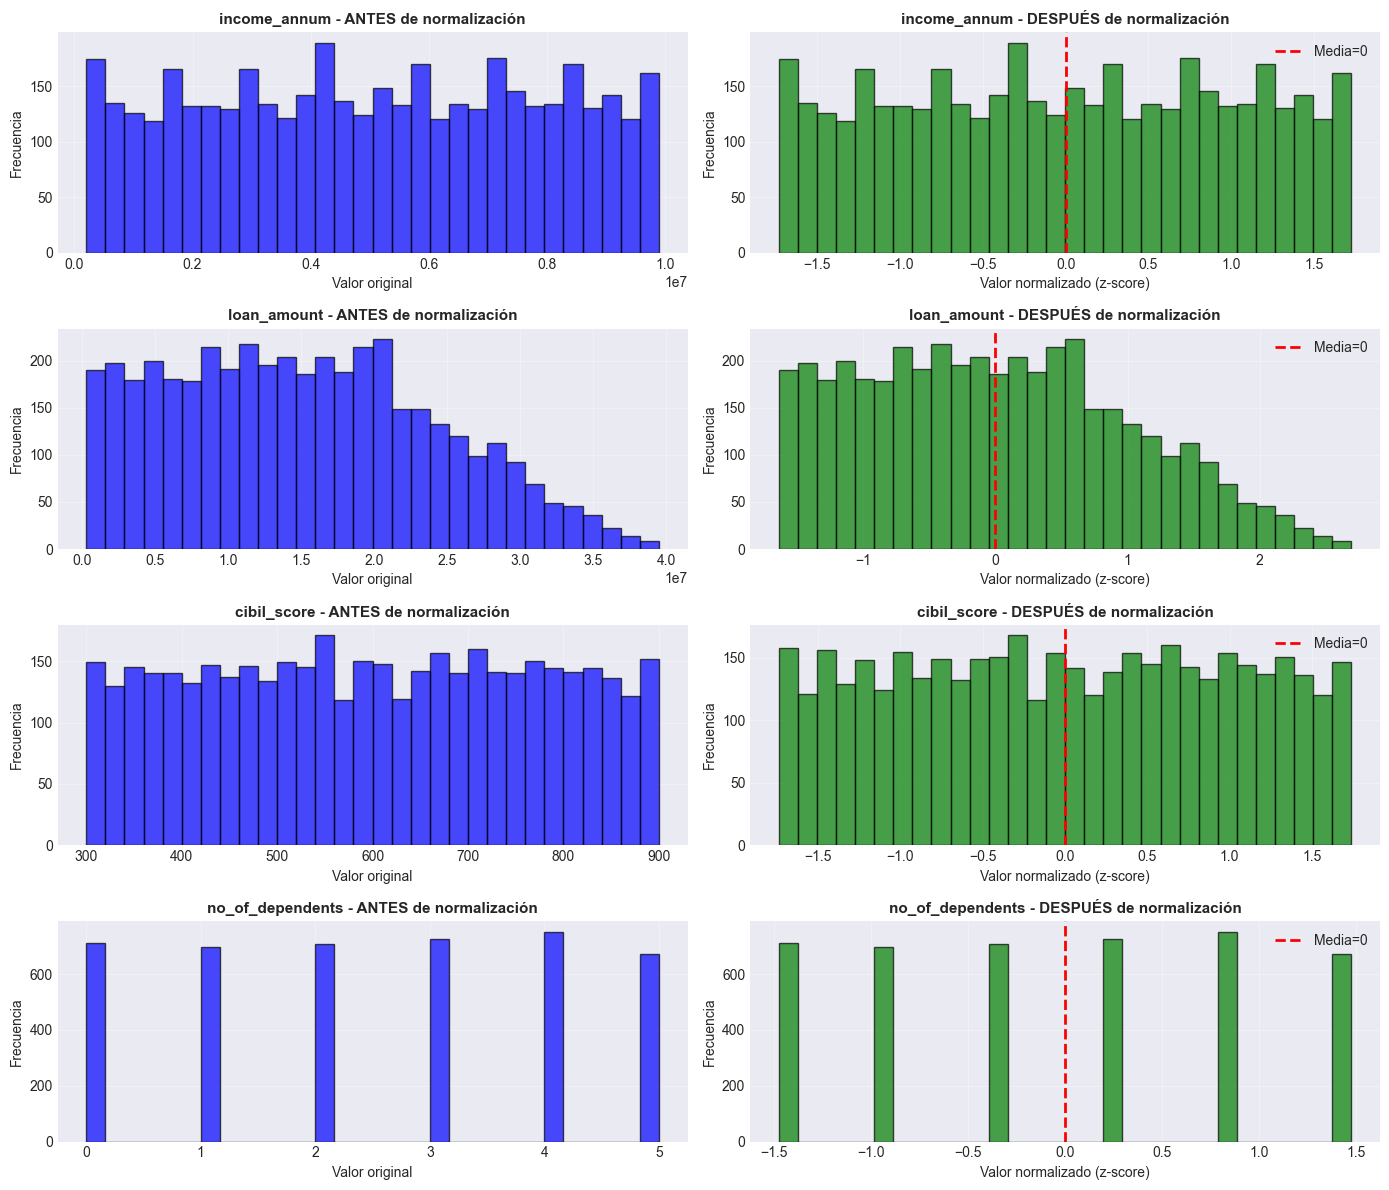

In [112]:
# Visualización comparativa de normalización
print("VISUALIZACIÓN DEL EFECTO DE LA NORMALIZACIÓN")
print("="*80)

# Seleccionar algunas variables para visualizar
variables_muestra = ['income_annum', 'loan_amount', 'cibil_score', 'no_of_dependents']

fig, axes = plt.subplots(len(variables_muestra), 2, figsize=(14, len(variables_muestra)*3))

for idx, col in enumerate(variables_muestra):
    # Antes de normalización
    axes[idx, 0].hist(df_clean[col], bins=30, edgecolor='black', alpha=0.7, color='blue')
    axes[idx, 0].set_title(f'{col} - ANTES de normalización', fontsize=11, fontweight='bold')
    axes[idx, 0].set_xlabel('Valor original')
    axes[idx, 0].set_ylabel('Frecuencia')
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Después de normalización
    axes[idx, 1].hist(df_normalized[col], bins=30, edgecolor='black', alpha=0.7, color='green')
    axes[idx, 1].set_title(f'{col} - DESPUÉS de normalización', fontsize=11, fontweight='bold')
    axes[idx, 1].set_xlabel('Valor normalizado (z-score)')
    axes[idx, 1].set_ylabel('Frecuencia')
    axes[idx, 1].grid(True, alpha=0.3)
    axes[idx, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Media=0')
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()


### 2.3. Codificación de variables categóricas

#### 2.3.1. Análisis de variables categóricas a codificar

Las redes neuronales solo pueden trabajar con números, por lo que debemos convertir las variables categóricas a formato numérico.

**Variables a codificar:**
1. **education**: Graduate / Not Graduate (2 categorías)
2. **self_employed**: Yes / No (2 categorías)
3. **loan_status**: Approved / Rejected (2 categorías - **variable objetivo**)

**Estrategia:**
- Para variables binarias (2 categorías): **Label Encoding** (0 y 1)
- Esto es apropiado porque hay un orden implícito o son binarias

**Mapeo:**
- education: Graduate=1, Not Graduate=0
- self_employed: Yes=1, No=0
- loan_status: Approved=1, Rejected=0

In [113]:
# Análisis de variables categóricas
print("ANÁLISIS DE VARIABLES CATEGÓRICAS A CODIFICAR")
print("="*80)

print("\nVariables categóricas en el dataset:")
for col in columnas_categoricas:
    print(f"\n{col}:")
    print(f"  Valores únicos: {df_normalized[col].unique()}")
    print(f"  Número de categorías: {df_normalized[col].nunique()}")
    print(f"  Distribución:")
    print(df_normalized[col].value_counts().to_string())

print("\n" + "="*80)
print("ESTRATEGIA DE CODIFICACIÓN:")
print("="*80)
print("""
Todas las variables son binarias (2 categorías), por lo que utilizaremos
Label Encoding (codificación binaria 0/1):

1. education:     Graduate=1, Not Graduate=0
2. self_employed: Yes=1, No=0
3. loan_status:   Approved=1, Rejected=0 (variable objetivo)
""")

ANÁLISIS DE VARIABLES CATEGÓRICAS A CODIFICAR

Variables categóricas en el dataset:

education:
  Valores únicos: ['Graduate' 'Not Graduate']
  Número de categorías: 2
  Distribución:
education
Graduate        2144
Not Graduate    2125

self_employed:
  Valores únicos: ['No' 'Yes']
  Número de categorías: 2
  Distribución:
self_employed
Yes    2150
No     2119

loan_status:
  Valores únicos: ['Approved' 'Rejected']
  Número de categorías: 2
  Distribución:
loan_status
Approved    2656
Rejected    1613

ESTRATEGIA DE CODIFICACIÓN:

Todas las variables son binarias (2 categorías), por lo que utilizaremos
Label Encoding (codificación binaria 0/1):

1. education:     Graduate=1, Not Graduate=0
2. self_employed: Yes=1, No=0
3. loan_status:   Approved=1, Rejected=0 (variable objetivo)



#### 2.3.2. Codificar variables de entrada (features)

Codificaremos las variables categóricas de entrada: `education` y `self_employed`.

In [114]:
# Crear copia para codificación
df_encoded = df_normalized.copy()

print("CODIFICACIÓN DE VARIABLES DE ENTRADA")
print("="*80)

# Diccionarios de mapeo
mapeo_education = {'Graduate': 1, 'Not Graduate': 0}
mapeo_self_employed = {'Yes': 1, 'No': 0}

# Aplicar mapeo
df_encoded['education'] = df_encoded['education'].map(mapeo_education)
df_encoded['self_employed'] = df_encoded['self_employed'].map(mapeo_self_employed)

# Verificar codificación
print("\nVerificación de codificación:")
print("\n1. education:")
print(f"   Valores antes: {df_normalized['education'].unique()}")
print(f"   Valores después: {df_encoded['education'].unique()}")
print(f"   Tipo de dato: {df_encoded['education'].dtype}")
print(f"   Distribución:")
print(df_encoded['education'].value_counts().sort_index().to_string())

print("\n2. self_employed:")
print(f"   Valores antes: {df_normalized['self_employed'].unique()}")
print(f"   Valores después: {df_encoded['self_employed'].unique()}")
print(f"   Tipo de dato: {df_encoded['self_employed'].dtype}")
print(f"   Distribución:")
print(df_encoded['self_employed'].value_counts().sort_index().to_string())

print("\n✓ Variables de entrada codificadas correctamente")

CODIFICACIÓN DE VARIABLES DE ENTRADA

Verificación de codificación:

1. education:
   Valores antes: ['Graduate' 'Not Graduate']
   Valores después: [1 0]
   Tipo de dato: int64
   Distribución:
education
0    2125
1    2144

2. self_employed:
   Valores antes: ['No' 'Yes']
   Valores después: [0 1]
   Tipo de dato: int64
   Distribución:
self_employed
0    2119
1    2150

✓ Variables de entrada codificadas correctamente


#### 2.3.3. Codificar variable objetivo (target)

Codificaremos la variable objetivo `loan_status` que es la que nuestra red neuronal intentará predecir.

**Mapeo:**
- Approved (clase positiva) = 1
- Rejected (clase negativa) = 0

In [115]:
# Codificar variable objetivo
print("CODIFICACIÓN DE VARIABLE OBJETIVO")
print("="*80)

# Diccionario de mapeo
mapeo_loan_status = {'Approved': 1, 'Rejected': 0}

# Aplicar mapeo
df_encoded['loan_status'] = df_encoded['loan_status'].map(mapeo_loan_status)

# Verificar codificación
print("\nloan_status:")
print(f"   Valores antes: {df_normalized['loan_status'].unique()}")
print(f"   Valores después: {df_encoded['loan_status'].unique()}")
print(f"   Tipo de dato: {df_encoded['loan_status'].dtype}")

print(f"\nDistribución:")
conteo = df_encoded['loan_status'].value_counts().sort_index()
for valor, count in conteo.items():
    etiqueta = "Rejected" if valor == 0 else "Approved"
    porcentaje = (count / len(df_encoded)) * 100
    print(f"   {valor} ({etiqueta}): {count} ({porcentaje:.2f}%)")

print("\n✓ Variable objetivo codificada correctamente")

CODIFICACIÓN DE VARIABLE OBJETIVO

loan_status:
   Valores antes: ['Approved' 'Rejected']
   Valores después: [1 0]
   Tipo de dato: int64

Distribución:
   0 (Rejected): 1613 (37.78%)
   1 (Approved): 2656 (62.22%)

✓ Variable objetivo codificada correctamente


#### 2.3.4. Verificación final de codificación

Verificaremos que todas las columnas del dataset ahora sean numéricas y estén listas para el entrenamiento de la red neuronal.

In [ ]:
# Verificación final de codificación
print("VERIFICACIÓN FINAL DE CODIFICACIÓN")
print("="*80)

print("\n1. Tipos de datos:")
print(df_encoded.dtypes.to_string())

print("\n2. Resumen por tipo:")
print(df_encoded.dtypes.value_counts().to_string())

print("\n3. Valores únicos en variables codificadas:")
for col in ['education', 'self_employed', 'loan_status']:
    print(f"   {col}: {sorted(df_encoded[col].unique())}")

print("\n4. Verificar que no hay valores no numéricos:")
columnas_no_numericas = df_encoded.select_dtypes(exclude=[np.number]).columns.tolist()
if len(columnas_no_numericas) == 0:
    print("Todas las columnas son numéricas")
else:
    print(f"Columnas no numéricas encontradas: {columnas_no_numericas}")

print("\n5. Primeras filas del dataset codificado:")
print(df_encoded.head())

print("\n" + "="*80)
print("✓ DATASET COMPLETAMENTE CODIFICADO Y LISTO PARA BALANCEO")

VERIFICACIÓN FINAL DE CODIFICACIÓN

1. Tipos de datos:
loan_id                       int64
no_of_dependents            float64
education                     int64
self_employed                 int64
income_annum                float64
loan_amount                 float64
loan_term                   float64
cibil_score                 float64
residential_assets_value    float64
commercial_assets_value     float64
luxury_assets_value         float64
bank_asset_value            float64
loan_status                   int64

2. Resumen por tipo:
float64    9
int64      4

3. Valores únicos en variables codificadas:
   education: [np.int64(0), np.int64(1)]
   self_employed: [np.int64(0), np.int64(1)]
   loan_status: [np.int64(0), np.int64(1)]

4. Verificar que no hay valores no numéricos:
   ✓ Todas las columnas son numéricas

5. Primeras filas del dataset codificado:
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1         -0.294102          1              0 

### 2.4. Balanceo de clases

#### 2.4.1. Análisis del desbalanceo

Recordemos que nuestro dataset tiene un desbalanceo de clases con un ratio de 1.65:1:
- **Approved (1)**: 62.22%
- **Rejected (0)**: 37.78%

**¿Por qué es importante balancear?**

1. **Sesgo del modelo**: La red neuronal puede aprender a predecir siempre la clase mayoritaria
2. **Métricas engañosas**: Una accuracy del 62% se lograría prediciendo siempre "Approved"
3. **Bajo rendimiento en clase minoritaria**: El modelo puede ignorar la clase "Rejected"

**Estrategias de balanceo:**
1. **Oversampling**: Duplicar ejemplos de la clase minoritaria (Rejected)
2. **Undersampling**: Reducir ejemplos de la clase mayoritaria (Approved)
3. **SMOTE**: Crear ejemplos sintéticos (más avanzado)

Para este proyecto utilizaremos **Random Oversampling** de la clase minoritaria, ya que:
- No perdemos datos (como en undersampling)
- Es simple y efectivo
- Funciona bien con redes neuronales

ANÁLISIS DEL DESBALANCEO DE CLASES

Distribución actual:
  Clase 0 (Rejected):  1613 ejemplos (37.78%)
  Clase 1 (Approved):  2656 ejemplos (62.22%)

Ratio de desbalanceo: 1.65:1


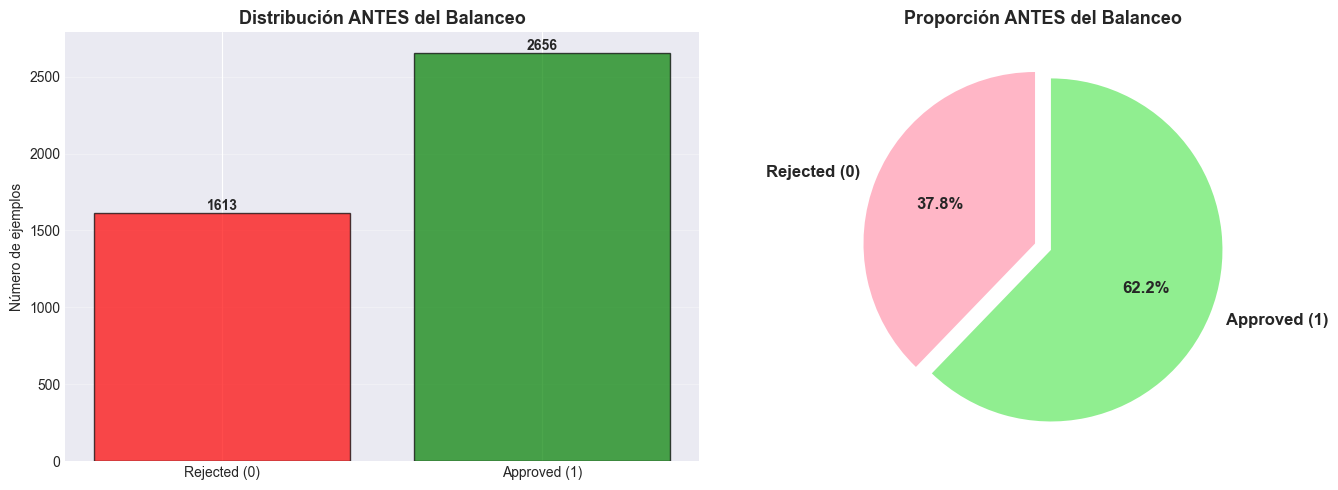

In [118]:
# Análisis del desbalanceo actual
print("ANÁLISIS DEL DESBALANCEO DE CLASES")
print("="*80)

# Contar clases
conteo_clases = df_encoded['loan_status'].value_counts().sort_index()
total = len(df_encoded)

print("\nDistribución actual:")
for clase, count in conteo_clases.items():
    etiqueta = "Rejected" if clase == 0 else "Approved"
    porcentaje = (count / total) * 100
    print(f"  Clase {clase} ({etiqueta}): {count:>5} ejemplos ({porcentaje:>5.2f}%)")

# Calcular ratio
ratio = conteo_clases.max() / conteo_clases.min()
print(f"\nRatio de desbalanceo: {ratio:.2f}:1")

# Visualización del desbalanceo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(['Rejected (0)', 'Approved (1)'], conteo_clases.values, 
            color=['red', 'green'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución ANTES del Balanceo', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Número de ejemplos')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(conteo_clases.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
colors = ['#FFB6C6', '#90EE90']
axes[1].pie(conteo_clases.values, labels=['Rejected (0)', 'Approved (1)'], 
            autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05),
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporción ANTES del Balanceo', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

#### 2.4.2. Aplicar Random Oversampling

Aplicaremos Random Oversampling para igualar el número de ejemplos en ambas clases. Esto se hace duplicando aleatoriamente ejemplos de la clase minoritaria (Rejected) hasta igualar la cantidad de la clase mayoritaria (Approved).

In [120]:
# Separar por clases
print("APLICANDO RANDOM OVERSAMPLING")
print("="*80)

# Separar el dataset por clase
df_clase_mayoritaria = df_encoded[df_encoded['loan_status'] == 1]  # Approved
df_clase_minoritaria = df_encoded[df_encoded['loan_status'] == 0]  # Rejected

print(f"\nAntes del balanceo:")
print(f"  Clase mayoritaria (Approved): {len(df_clase_mayoritaria)} ejemplos")
print(f"  Clase minoritaria (Rejected): {len(df_clase_minoritaria)} ejemplos")

# Aplicar oversampling a la clase minoritaria
df_clase_minoritaria_oversampled = resample(
    df_clase_minoritaria,
    replace=True,  # Muestreo con reemplazo
    n_samples=len(df_clase_mayoritaria),  # Igualar a la clase mayoritaria
    random_state=42  # Para reproducibilidad
)

# Combinar las clases balanceadas
df_balanced = pd.concat([df_clase_mayoritaria, df_clase_minoritaria_oversampled])

# Mezclar aleatoriamente el dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nDespués del balanceo:")
print(f"  Clase mayoritaria (Approved): {len(df_balanced[df_balanced['loan_status'] == 1])} ejemplos")
print(f"  Clase minoritaria (Rejected): {len(df_balanced[df_balanced['loan_status'] == 0])} ejemplos")
print(f"  Total de ejemplos: {len(df_balanced)}")

# Verificar balanceo
conteo_balanceado = df_balanced['loan_status'].value_counts().sort_index()
print(f"\nDistribución balanceada:")
for clase, count in conteo_balanceado.items():
    etiqueta = "Rejected" if clase == 0 else "Approved"
    porcentaje = (count / len(df_balanced)) * 100
    print(f"  Clase {clase} ({etiqueta}): {count:>5} ejemplos ({porcentaje:>5.2f}%)")

APLICANDO RANDOM OVERSAMPLING

Antes del balanceo:
  Clase mayoritaria (Approved): 2656 ejemplos
  Clase minoritaria (Rejected): 1613 ejemplos

Después del balanceo:
  Clase mayoritaria (Approved): 2656 ejemplos
  Clase minoritaria (Rejected): 2656 ejemplos
  Total de ejemplos: 5312

Distribución balanceada:
  Clase 0 (Rejected):  2656 ejemplos (50.00%)
  Clase 1 (Approved):  2656 ejemplos (50.00%)


#### 2.4.3. Visualización comparativa del balanceo

Compararemos visualmente la distribución de clases antes y después del balanceo.

VISUALIZACIÓN COMPARATIVA DEL BALANCEO


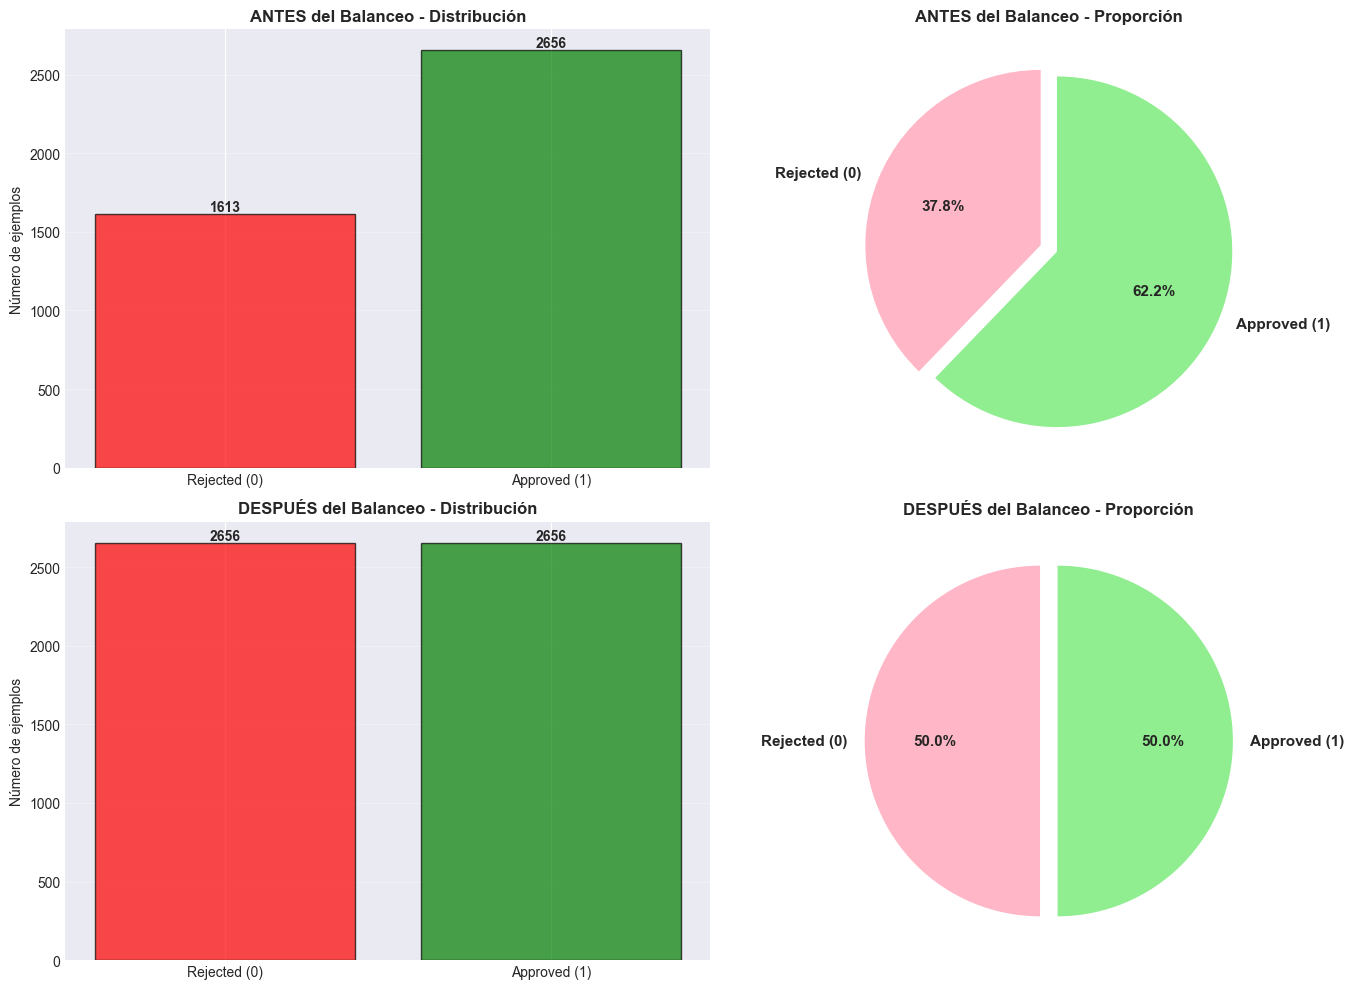


Resumen:
  Dataset ANTES:   4269 ejemplos (desbalanceado)
  Dataset DESPUÉS: 5312 ejemplos (balanceado 50-50)


In [122]:
# Visualización comparativa antes/después del balanceo
print("VISUALIZACIÓN COMPARATIVA DEL BALANCEO")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ANTES - Gráfico de barras
conteo_antes = df_encoded['loan_status'].value_counts().sort_index()
axes[0, 0].bar(['Rejected (0)', 'Approved (1)'], conteo_antes.values,
               color=['red', 'green'], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('ANTES del Balanceo - Distribución', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Número de ejemplos')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(conteo_antes.values):
    axes[0, 0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# ANTES - Gráfico de pastel
axes[0, 1].pie(conteo_antes.values, labels=['Rejected (0)', 'Approved (1)'],
               autopct='%1.1f%%', startangle=90, colors=['#FFB6C6', '#90EE90'],
               explode=(0.05, 0.05), textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0, 1].set_title('ANTES del Balanceo - Proporción', fontsize=12, fontweight='bold')

# DESPUÉS - Gráfico de barras
conteo_despues = df_balanced['loan_status'].value_counts().sort_index()
axes[1, 0].bar(['Rejected (0)', 'Approved (1)'], conteo_despues.values,
               color=['red', 'green'], alpha=0.7, edgecolor='black')
axes[1, 0].set_title('DESPUÉS del Balanceo - Distribución', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Número de ejemplos')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(conteo_despues.values):
    axes[1, 0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# DESPUÉS - Gráfico de pastel
axes[1, 1].pie(conteo_despues.values, labels=['Rejected (0)', 'Approved (1)'],
               autopct='%1.1f%%', startangle=90, colors=['#FFB6C6', '#90EE90'],
               explode=(0.05, 0.05), textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 1].set_title('DESPUÉS del Balanceo - Proporción', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nResumen:")
print(f"  Dataset ANTES:   {len(df_encoded)} ejemplos (desbalanceado)")
print(f"  Dataset DESPUÉS: {len(df_balanced)} ejemplos (balanceado 50-50)")

### 2.5. División del conjunto de datos

#### 2.5.1. Estrategia de división

Dividiremos el dataset en tres conjuntos independientes:

1. **Entrenamiento (Training)**: 70% - Para entrenar la red neuronal
2. **Validación (Validation)**: 15% - Para ajustar hiperparámetros durante el entrenamiento
3. **Prueba (Test)**: 15% - Para evaluación final del modelo

**¿Por qué tres conjuntos?**

- **Training**: El modelo aprende los patrones
- **Validation**: Monitorea el rendimiento durante el entrenamiento y detecta overfitting
- **Test**: Evaluación imparcial del modelo final (datos nunca vistos)

**Consideraciones importantes:**
- Usar `stratify` para mantener la proporción de clases en cada conjunto
- Establecer `random_state` para reproducibilidad
- Separar características (X) de la variable objetivo (y)

In [123]:
# Estrategia de división
print("ESTRATEGIA DE DIVISIÓN DEL DATASET")
print("="*80)

print("\nProporciones definidas:")
print("  Entrenamiento (Training): 70%")
print("  Validación (Validation):  15%")
print("  Prueba (Test):            15%")

print("\nTotal de ejemplos disponibles:")
print(f"  Dataset balanceado: {len(df_balanced)} ejemplos")

# Calcular tamaños esperados
total = len(df_balanced)
train_size = int(0.70 * total)
val_size = int(0.15 * total)
test_size = total - train_size - val_size  # Para asegurar que sumen exactamente

print(f"\nTamaños esperados:")
print(f"  Training:   {train_size} ejemplos")
print(f"  Validation: {val_size} ejemplos")
print(f"  Test:       {test_size} ejemplos")
print(f"  Total:      {train_size + val_size + test_size} ejemplos")

ESTRATEGIA DE DIVISIÓN DEL DATASET

Proporciones definidas:
  Entrenamiento (Training): 70%
  Validación (Validation):  15%
  Prueba (Test):            15%

Total de ejemplos disponibles:
  Dataset balanceado: 5312 ejemplos

Tamaños esperados:
  Training:   3718 ejemplos
  Validation: 796 ejemplos
  Test:       798 ejemplos
  Total:      5312 ejemplos


#### 2.5.2. Separar características (X) y variable objetivo (y)

Antes de dividir el dataset, debemos separar:
- **X**: Características de entrada (features) - todas las columnas excepto `loan_id` y `loan_status`
- **y**: Variable objetivo (target) - `loan_status`

Excluimos `loan_id` porque es solo un identificador y no aporta información predictiva.

In [124]:
# Separar características y variable objetivo
print("SEPARACIÓN DE CARACTERÍSTICAS Y VARIABLE OBJETIVO")
print("="*80)

# Identificar columnas
columnas_excluir = ['loan_id', 'loan_status']
columnas_features = [col for col in df_balanced.columns if col not in columnas_excluir]

print(f"\nCaracterísticas (X) - {len(columnas_features)} columnas:")
for i, col in enumerate(columnas_features, 1):
    print(f"  {i:2d}. {col}")

print(f"\nVariable objetivo (y): loan_status")

# Crear X (características) y y (objetivo)
X = df_balanced[columnas_features].values
y = df_balanced['loan_status'].values

print(f"\nDimensiones:")
print(f"  X (características): {X.shape}")
print(f"  y (objetivo):        {y.shape}")

print(f"\nTipos de datos:")
print(f"  X: {X.dtype}")
print(f"  y: {y.dtype}")

print(f"\nVerificación de la variable objetivo:")
unique, counts = np.unique(y, return_counts=True)
for val, count in zip(unique, counts):
    etiqueta = "Rejected" if val == 0 else "Approved"
    porcentaje = (count / len(y)) * 100
    print(f"  Clase {val} ({etiqueta}): {count} ({porcentaje:.2f}%)")

print("\n✓ Separación completada correctamente")

SEPARACIÓN DE CARACTERÍSTICAS Y VARIABLE OBJETIVO

Características (X) - 11 columnas:
   1. no_of_dependents
   2. education
   3. self_employed
   4. income_annum
   5. loan_amount
   6. loan_term
   7. cibil_score
   8. residential_assets_value
   9. commercial_assets_value
  10. luxury_assets_value
  11. bank_asset_value

Variable objetivo (y): loan_status

Dimensiones:
  X (características): (5312, 11)
  y (objetivo):        (5312,)

Tipos de datos:
  X: float64
  y: int64

Verificación de la variable objetivo:
  Clase 0 (Rejected): 2656 (50.00%)
  Clase 1 (Approved): 2656 (50.00%)

✓ Separación completada correctamente


#### 2.5.3. Primera división: Training+Validation vs Test

Primero separaremos el conjunto de prueba (15%) del resto de los datos (85%). Esto asegura que el conjunto de prueba nunca se use durante el entrenamiento o validación.

Usaremos `stratify=y` para mantener la proporción de clases en ambos conjuntos.

In [125]:
# Primera división: separar conjunto de prueba
print("PRIMERA DIVISIÓN: Separar conjunto de PRUEBA (TEST)")
print("="*80)

# Dividir en (Train+Val) y Test
# Test = 15%, Train+Val = 85%
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42,
    stratify=y
)

print(f"\nResultado de la primera división:")
print(f"  X_temp (Train+Val): {X_temp.shape}")
print(f"  X_test:             {X_test.shape}")
print(f"  y_temp (Train+Val): {y_temp.shape}")
print(f"  y_test:             {y_test.shape}")

# Verificar distribución en conjunto de prueba
print(f"\nDistribución en conjunto de PRUEBA:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for val, count in zip(unique_test, counts_test):
    etiqueta = "Rejected" if val == 0 else "Approved"
    porcentaje = (count / len(y_test)) * 100
    print(f"  Clase {val} ({etiqueta}): {count} ({porcentaje:.2f}%)")

print("\n✓ Conjunto de prueba separado exitosamente")

PRIMERA DIVISIÓN: Separar conjunto de PRUEBA (TEST)

Resultado de la primera división:
  X_temp (Train+Val): (4515, 11)
  X_test:             (797, 11)
  y_temp (Train+Val): (4515,)
  y_test:             (797,)

Distribución en conjunto de PRUEBA:
  Clase 0 (Rejected): 399 (50.06%)
  Clase 1 (Approved): 398 (49.94%)

✓ Conjunto de prueba separado exitosamente


#### 2.5.4. Segunda división: Training vs Validation

Ahora dividiremos los datos restantes (85%) en:
- **Training**: 70% del total original ≈ 82.35% de X_temp
- **Validation**: 15% del total original ≈ 17.65% de X_temp

Cálculo: Para obtener 15% del total desde el 85% restante: 15/85 ≈ 0.1765

In [126]:
# Segunda división: separar training y validation
print("SEGUNDA DIVISIÓN: Separar TRAINING y VALIDATION")
print("="*80)

# Calcular proporción para validation
# Queremos 15% del total, tenemos 85% en temp
# Entonces: 15/85 = 0.1765
val_size_from_temp = 0.15 / 0.85

print(f"\nProporción calculada para validation: {val_size_from_temp:.4f}")

# Dividir temp en Train y Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_size_from_temp,
    random_state=42,
    stratify=y_temp
)

print(f"\nResultado de la segunda división:")
print(f"  X_train: {X_train.shape}")
print(f"  X_val:   {X_val.shape}")
print(f"  X_test:  {X_test.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_val:   {y_val.shape}")
print(f"  y_test:  {y_test.shape}")

print("\n✓ División completada exitosamente")

SEGUNDA DIVISIÓN: Separar TRAINING y VALIDATION

Proporción calculada para validation: 0.1765

Resultado de la segunda división:
  X_train: (3718, 11)
  X_val:   (797, 11)
  X_test:  (797, 11)
  y_train: (3718,)
  y_val:   (797,)
  y_test:  (797,)

✓ División completada exitosamente


#### 2.5.5. Verificación final de la división

Verificaremos que la división se realizó correctamente y que las proporciones de clases se mantienen balanceadas en los tres conjuntos.

In [128]:
# Verificación completa de la división
print("VERIFICACIÓN FINAL DE LA DIVISIÓN")
print("="*80)

# Función auxiliar para mostrar estadísticas
def mostrar_estadisticas_conjunto(X, y, nombre):
    print(f"\n{nombre}:")
    print(f"  Tamaño:      {len(X)} ejemplos ({len(X)/len(df_balanced)*100:.2f}% del total)")
    print(f"  Dimensiones: {X.shape}")
    print(f"  Distribución de clases:")
    unique, counts = np.unique(y, return_counts=True)
    for val, count in zip(unique, counts):
        etiqueta = "Rejected" if val == 0 else "Approved"
        porcentaje = (count / len(y)) * 100
        print(f"    Clase {val} ({etiqueta}): {count} ({porcentaje:.2f}%)")

# Mostrar estadísticas de cada conjunto
mostrar_estadisticas_conjunto(X_train, y_train, "TRAINING SET")
mostrar_estadisticas_conjunto(X_val, y_val, "VALIDATION SET")
mostrar_estadisticas_conjunto(X_test, y_test, "TEST SET")

# Verificación adicional
print("\n" + "="*80)
print("VERIFICACIONES:")
print("="*80)

total_ejemplos = len(X_train) + len(X_val) + len(X_test)
print(f"\n1. Total de ejemplos: {total_ejemplos}")
print(f"   ¿Coincide con el dataset balanceado? {total_ejemplos == len(df_balanced)}")

print(f"\n2. Proporciones:")
print(f"   Training:   {len(X_train)/total_ejemplos*100:.2f}%")
print(f"   Validation: {len(X_val)/total_ejemplos*100:.2f}%")
print(f"   Test:       {len(X_test)/total_ejemplos*100:.2f}%")

print(f"\n3. Balanceo de clases:")
for nombre, y_set in [("Training", y_train), ("Validation", y_val), ("Test", y_test)]:
    unique, counts = np.unique(y_set, return_counts=True)
    ratio = counts[1] / counts[0] if len(counts) == 2 else 0
    print(f"   {nombre:12s}: Ratio = {ratio:.4f} (ideal = 1.0000)")

print(f"\n4. Número de características:")
print(f"   X_train:  {X_train.shape[1]} features")
print(f"   X_val:    {X_val.shape[1]} features")
print(f"   X_test:   {X_test.shape[1]} features")
print(f"   ¿Todas iguales? {X_train.shape[1] == X_val.shape[1] == X_test.shape[1]}")


VERIFICACIÓN FINAL DE LA DIVISIÓN

TRAINING SET:
  Tamaño:      3718 ejemplos (69.99% del total)
  Dimensiones: (3718, 11)
  Distribución de clases:
    Clase 0 (Rejected): 1859 (50.00%)
    Clase 1 (Approved): 1859 (50.00%)

VALIDATION SET:
  Tamaño:      797 ejemplos (15.00% del total)
  Dimensiones: (797, 11)
  Distribución de clases:
    Clase 0 (Rejected): 398 (49.94%)
    Clase 1 (Approved): 399 (50.06%)

TEST SET:
  Tamaño:      797 ejemplos (15.00% del total)
  Dimensiones: (797, 11)
  Distribución de clases:
    Clase 0 (Rejected): 399 (50.06%)
    Clase 1 (Approved): 398 (49.94%)

VERIFICACIONES:

1. Total de ejemplos: 5312
   ¿Coincide con el dataset balanceado? True

2. Proporciones:
   Training:   69.99%
   Validation: 15.00%
   Test:       15.00%

3. Balanceo de clases:
   Training    : Ratio = 1.0000 (ideal = 1.0000)
   Validation  : Ratio = 1.0025 (ideal = 1.0000)
   Test        : Ratio = 0.9975 (ideal = 1.0000)

4. Número de características:
   X_train:  11 features
  

#### 2.5.6. Visualización final de la división

Crearemos visualizaciones para mostrar claramente la distribución de los datos en los tres conjuntos.

VISUALIZACIÓN DE LA DIVISIÓN DEL DATASET


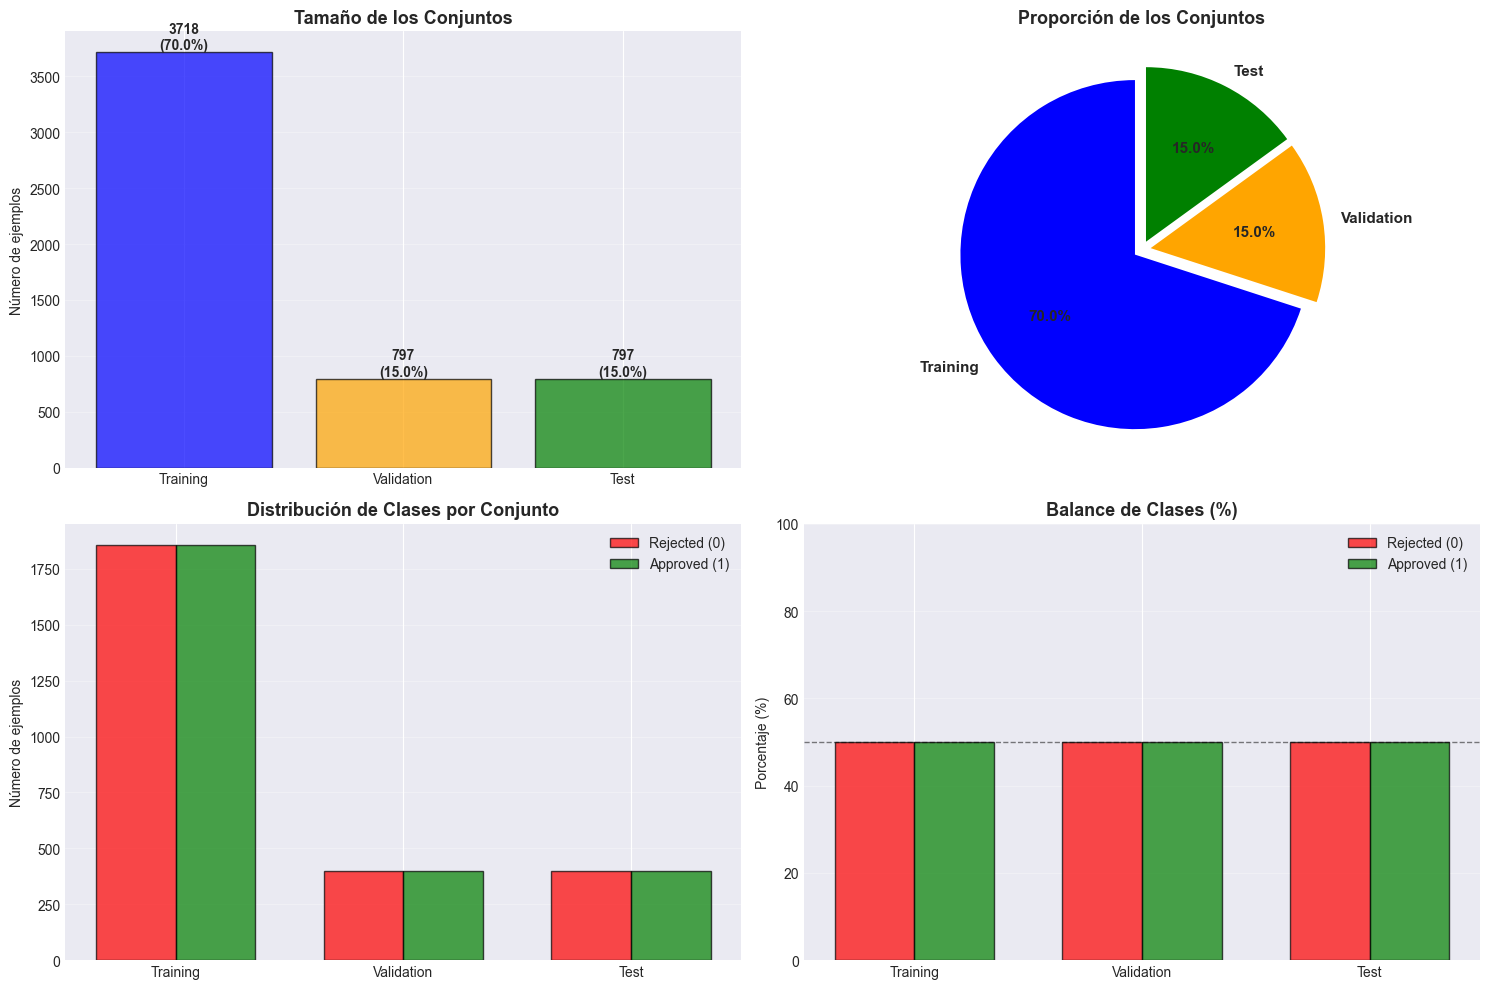

In [130]:
# Visualización de la división
print("VISUALIZACIÓN DE LA DIVISIÓN DEL DATASET")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Tamaños de los conjuntos
conjuntos = ['Training', 'Validation', 'Test']
tamaños = [len(X_train), len(X_val), len(X_test)]
colores = ['blue', 'orange', 'green']

axes[0, 0].bar(conjuntos, tamaños, color=colores, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Tamaño de los Conjuntos', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Número de ejemplos')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(tamaños):
    porcentaje = (v / sum(tamaños)) * 100
    axes[0, 0].text(i, v, f'{v}\n({porcentaje:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')

# 2. Proporción de los conjuntos (pastel)
axes[0, 1].pie(tamaños, labels=conjuntos, autopct='%1.1f%%',
               startangle=90, colors=colores, explode=(0.05, 0.05, 0.05),
               textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0, 1].set_title('Proporción de los Conjuntos', fontsize=13, fontweight='bold')

# 3. Distribución de clases por conjunto
x_pos = np.arange(len(conjuntos))
width = 0.35

rejected_counts = [
    np.sum(y_train == 0),
    np.sum(y_val == 0),
    np.sum(y_test == 0)
]
approved_counts = [
    np.sum(y_train == 1),
    np.sum(y_val == 1),
    np.sum(y_test == 1)
]

axes[1, 0].bar(x_pos - width/2, rejected_counts, width, 
               label='Rejected (0)', color='red', alpha=0.7, edgecolor='black')
axes[1, 0].bar(x_pos + width/2, approved_counts, width,
               label='Approved (1)', color='green', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribución de Clases por Conjunto', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Número de ejemplos')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(conjuntos)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Balance de clases (porcentaje)
balance_data = []
for y_set in [y_train, y_val, y_test]:
    unique, counts = np.unique(y_set, return_counts=True)
    percentages = (counts / len(y_set)) * 100
    balance_data.append(percentages)

balance_data = np.array(balance_data).T

x_pos = np.arange(len(conjuntos))
axes[1, 1].bar(x_pos - width/2, balance_data[0], width,
               label='Rejected (0)', color='red', alpha=0.7, edgecolor='black')
axes[1, 1].bar(x_pos + width/2, balance_data[1], width,
               label='Approved (1)', color='green', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Balance de Clases (%)', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Porcentaje (%)')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(conjuntos)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim([0, 100])
axes[1, 1].axhline(y=50, color='black', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()